<a href="https://colab.research.google.com/github/andtoo14/kamilimu_assignments/blob/andrew_python_libraries_2/python_libraries__2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

athletes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv")

countries = pd.read_csv("https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/countries.csv")

**SECTION ONE:**

In [5]:
import matplotlib.pyplot as plt

1. Plot a bar graph of the top 5 countries with the highest number of athletes. Display the athlete count value on top of each bar.

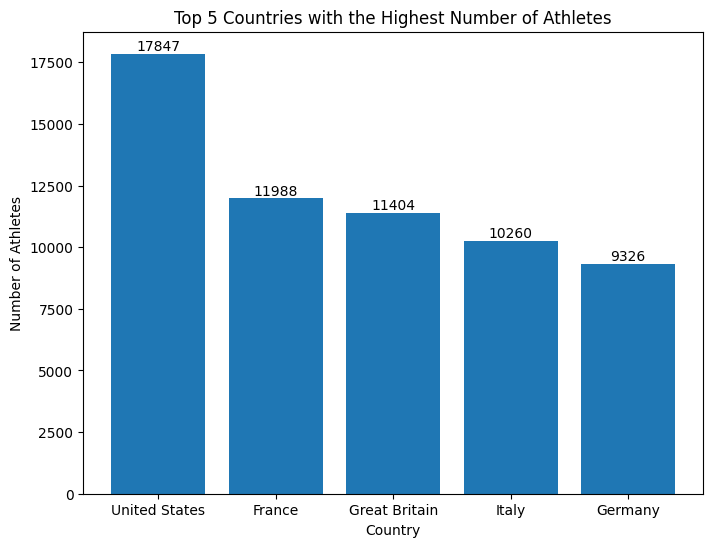

In [29]:
country_cts = athletes['Team'].value_counts().head(5)

plt.figure(figsize=(8, 6))
bars = plt.bar(country_cts.index, country_cts.values)
plt.xlabel("Country")
plt.ylabel("Number of Athletes")
plt.title("Top 5 Countries with the Highest Number of Athletes")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

2. Create a bar chart showing athlete counts by season (Summer and Winter). Set y-axis ticks from 0 to max count in steps of 5000. Assign summer the color turquoise and winter the color cyan. Set alpha=0.5 for transparency.

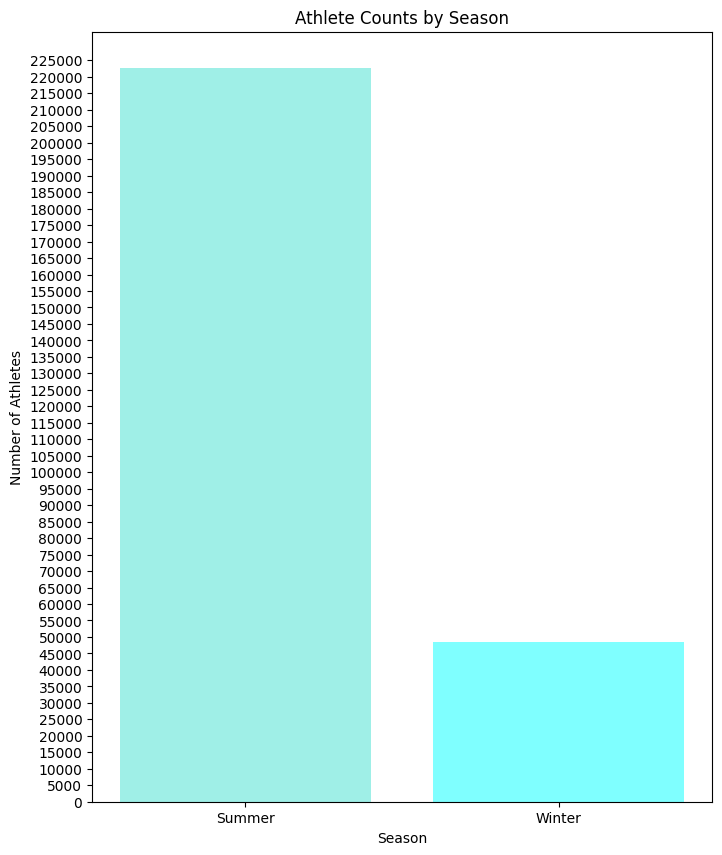

In [33]:
season_counts = athletes['Season'].value_counts()

plt.figure(figsize=(8, 10))
bars = plt.bar(season_counts.index, season_counts.values, color=['turquoise', 'cyan'], alpha=0.5)

plt.xlabel("Season")
plt.ylabel("Number of Athletes")
plt.title("Athlete Counts by Season")
plt.yticks(range(0, season_counts.max() + 5000, 5000))

plt.show()

3. Create a stacked bar chart where each bar represents a type of medal (Gold, Silver, Bronze), and the height of each bar shows the total number of times that medal was won. Each bar should be divided (stacked) by gender to show how many of those medals were won by male and female athletes. Move the legend to the right, outside the plot.

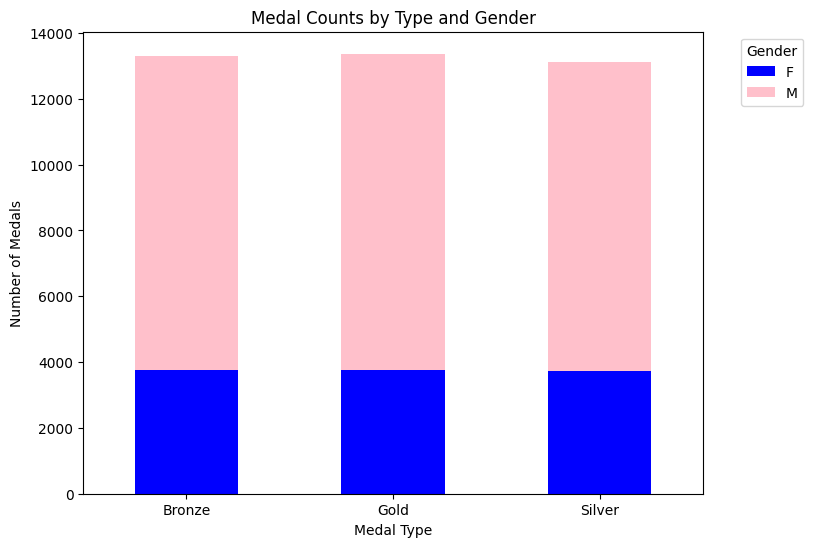

In [42]:
medal_winners = athletes.dropna(subset=['Medal'])
medal_counts = medal_winners.groupby(['Medal', 'Sex']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
medal_counts.plot(kind='bar', stacked=True, color=['blue', 'pink'], ax=plt.gca())

plt.xlabel("Medal Type")
plt.ylabel("Number of Medals")
plt.title("Medal Counts by Type and Gender")
plt.xticks(rotation=0)
plt.legend(title="Gender", loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

4.  Plot a scatterplot of weight (y-axis) against age(x-axis) of athletes. Add a vertical line at age 25 to split "younger" vs "older" athletes. Add a horizontal line at weight=70 to mark a reference threshold. Annotate both lines.



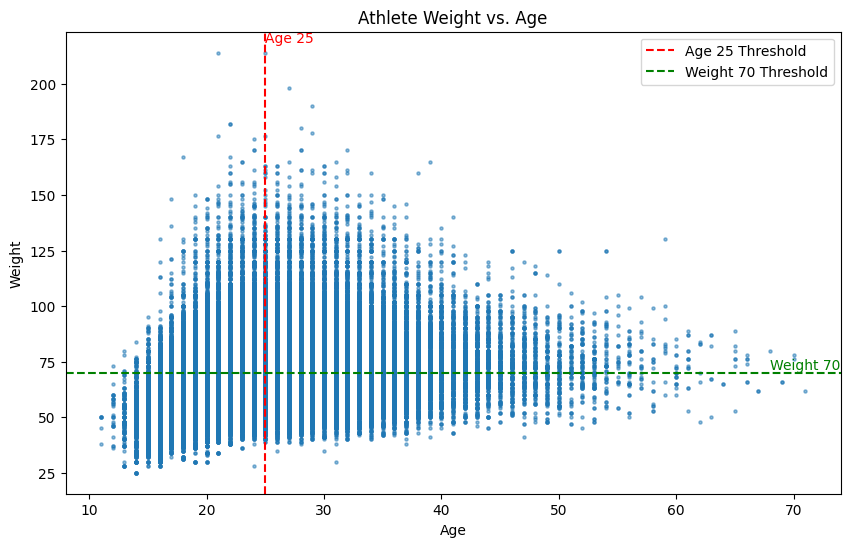

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(athletes['Age'], athletes['Weight'], alpha=0.5, s=5) # s is size

plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("Athlete Weight vs. Age")

# Add vertical line at Age = 25
plt.axvline(x=25, color='red', linestyle='--', label='Age 25 Threshold')
plt.text(25, plt.ylim()[1], 'Age 25', color='red', ha='left', va='top')

# Add horizontal line at Weight = 70
plt.axhline(y=70, color='green', linestyle='--', label='Weight 70 Threshold')
plt.text(plt.xlim()[1], 70, 'Weight 70', color='green', ha='right', va='bottom')

plt.legend()
plt.show()

5. Generate a figure with four subplots arranged in a 2x2 grid. Each subplot should display a scatter plot of athlete height (y-axis) versus weight (x-axis), using data filtered for a specific sport. The sports to be shown in the subplots are: Athletics, Gymnastics, Swimming, Cycling.

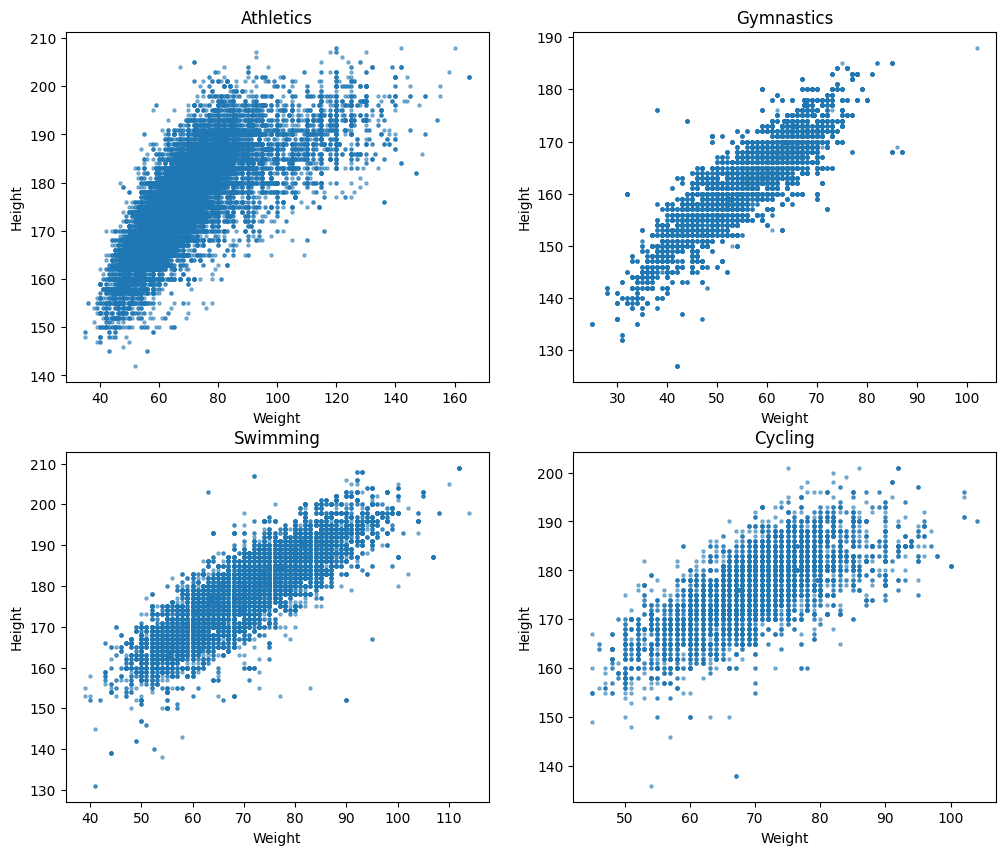

In [52]:
athletics_df = athletes[athletes['Sport'] == 'Athletics'][['Height', 'Weight']]
gymnastics_df = athletes[athletes['Sport'] == 'Gymnastics'][['Height', 'Weight']]
swimming_df = athletes[athletes['Sport'] == 'Swimming'][['Height', 'Weight']]
cycling_df = athletes[athletes['Sport'] == 'Cycling'][['Height', 'Weight']]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#Athletics subplot
axes[0, 0].scatter(athletics_df['Weight'], athletics_df['Height'], alpha=0.5, s=5)
axes[0, 0].set_title('Athletics')
axes[0, 0].set_xlabel('Weight')
axes[0, 0].set_ylabel('Height')

#Gymnastics subplot
axes[0, 1].scatter(gymnastics_df['Weight'], gymnastics_df['Height'], alpha=0.5, s=5)
axes[0, 1].set_title('Gymnastics')
axes[0, 1].set_xlabel('Weight')
axes[0, 1].set_ylabel('Height')

#Swimming subplot
axes[1, 0].scatter(swimming_df['Weight'], swimming_df['Height'], alpha=0.5, s=5)
axes[1, 0].set_title('Swimming')
axes[1, 0].set_xlabel('Weight')
axes[1, 0].set_ylabel('Height')

#Cycling subplot
axes[1, 1].scatter(cycling_df['Weight'], cycling_df['Height'], alpha=0.5, s=5)
axes[1, 1].set_title('Cycling')
axes[1, 1].set_xlabel('Weight')
axes[1, 1].set_ylabel('Height')

plt.show()

6. Plot two line graphs of number of athletes per year and average height per year on the same plot. Use left y-axis for count, right y-axis for average height. Label both axes clearly.

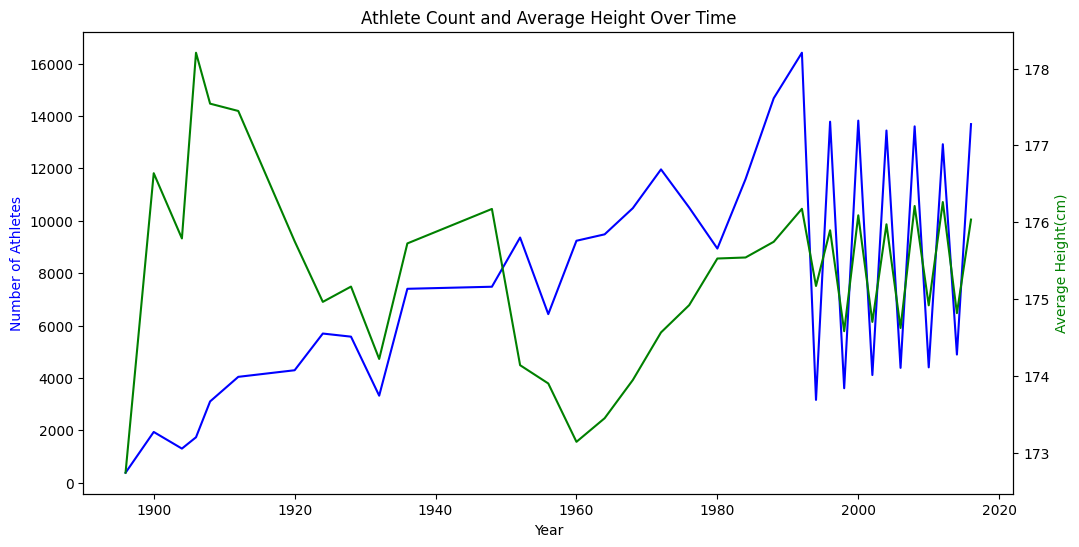

In [58]:
athlete_count_per_year = athletes.groupby('Year').size()

average_height_per_year = athletes.groupby('Year')['Height'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

athlete_count_per_year.plot(ax=ax1, color='blue', label='Athlete Count')
average_height_per_year.plot(ax=ax2, color='green', label='Average Height')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Athletes', color='blue')
ax2.set_ylabel('Average Height(cm)', color='green')
plt.title('Athlete Count and Average Height Over Time')
plt.show()

**SECTION TWO:**

1. Show height distribution by gender using a boxplot. Use hue to split by gender.

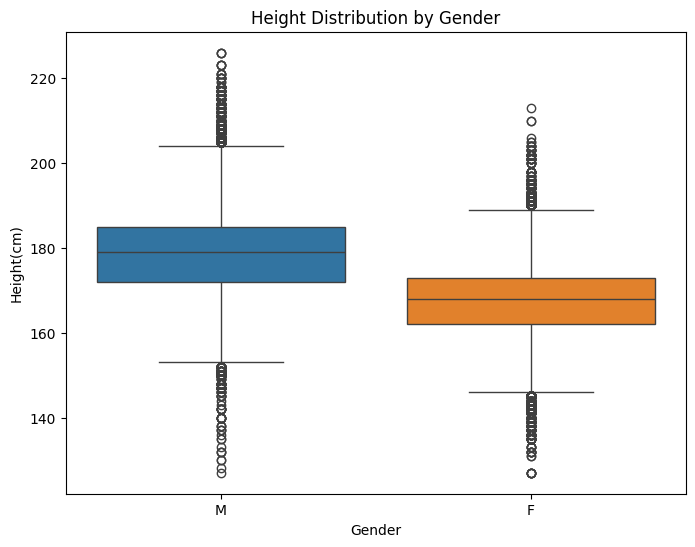

In [59]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Height', hue='Sex', data=athletes)
plt.xlabel("Gender")
plt.ylabel("Height(cm)")
plt.title("Height Distribution by Gender")
plt.show()

2. Plot a histogram of athlete ages. Use bins=15.

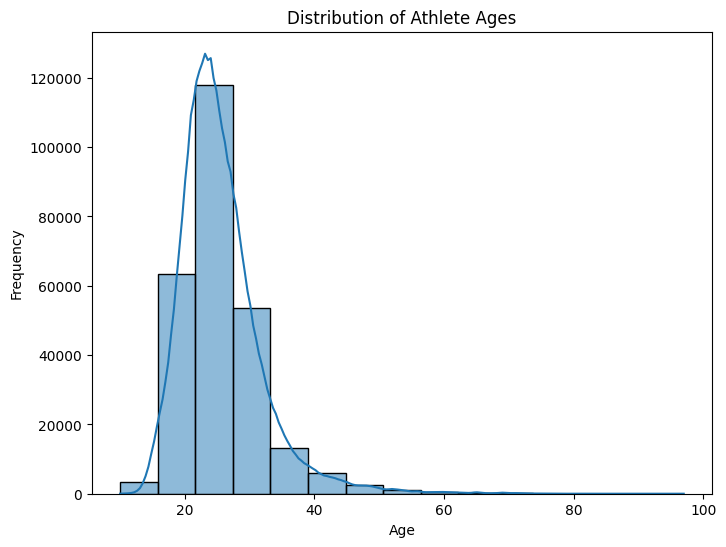

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(data=athletes, x='Age', bins=15, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Athlete Ages")
plt.show()

**SECTION THREE:**

Plot average height per year for 3 sports (e.g., Basketball, Volleyball, Athletics). Add interactive legend so user can select/deselect each sport.

In [64]:
import plotly.express as px

filtered_athletes = athletes[athletes['Sport'].isin(['Basketball', 'Volleyball', 'Athletics'])].copy()
average_height_sport_year = filtered_athletes.groupby(['Year', 'Sport'])['Height'].mean().reset_index()

fig = px.line(
    average_height_sport_year,
    x='Year',
    y='Height',
    color='Sport',
    title='Average Height per Year for Selected Sports'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Height (cm)',
    legend_title='Sport',
    hovermode='x unified'
)

fig.show()

**SECTION FOUR:**

Plot the locations of Kenya, Uganda, Burundi, and Rwanda on a map. Place a red marker on Kenya's location. The other countries should have grey markers.

In [65]:
import folium

# Filter the countries DataFrame to get the specified countries
select_countries = countries[countries['name'].isin(['Kenya', 'Uganda', 'Burundi', 'Rwanda'])]

# Create a map centered around the average location of the selected countries
center_lat = select_countries['latitude'].mean()
center_lon = select_countries['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add markers for each country
for index, row in select_countries.iterrows():
    country_name = row['name']
    latitude = row['latitude']
    longitude = row['longitude']
    color = 'red' if country_name == 'Kenya' else 'gray'

    folium.Marker(
        location=[latitude, longitude],
        popup=country_name,
        icon=folium.Icon(color=color)
    ).add_to(m)

# Display the map
m